Name: 吳泓毅

Student ID: 0716050

Oct 2020

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib3
import seaborn as sns

%matplotlib inline

# 1. Data Input

將下載下來的.data檔轉成.csv，然後利用pandas的read_csv讀檔，並將讀進來的data轉成DataFrame。

## Mushroom Data Input

In [2]:
mushroom_data = pd.read_csv("agaricus-lepiota.csv")
mushroom_df = pd.DataFrame(data=mushroom_data)
mushroom_df.rename(columns={'p': 'poisonous', 'x': 'cap-shape', 's': 'cap-surface', 'n': 'cap-color', 't': 'bruises?', 'p.1': 'odor', 'f': 'gill-attachment', 'c': 'gill-spacing', 'n.1': 'gill-size', 'k': 'gill-color', 'e': 'stalk-shape', 'e.1': 'stalk-root', 's.1': 'stalk-surface-above-ring', 's.2': 'stalk-surface-below-ring', 'w': 'stalk-color-above-ring', 'w.1': 'stalk-color-below-ring', 'p.2': 'veil-type', 'w.2': 'veil-color', 'o': 'ring-number', 'p.3': 'ring-type', 'k.1': 'spore-print-color', 's.3': 'population', 'u': 'habitat'}, inplace=True)

將Mushroom DataFrame中的column names（也就是feature names）重新命名為較好理解的詞。

## Iris Data Input

In [3]:
iris_data = pd.read_csv("iris.csv")
iris_df = pd.DataFrame(data=iris_data)
iris_df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']

由於原先Iris的data沒有column names，所以將column names加入DataFrame。

# 2. Visualization

## Mushroom Visualization

### Based on Frequency

利用Seaborn的countplot計算各features各種數值的數量，代表Frequency。
i代表Mushroom DataFrame中各個feature的名字。

Frequency


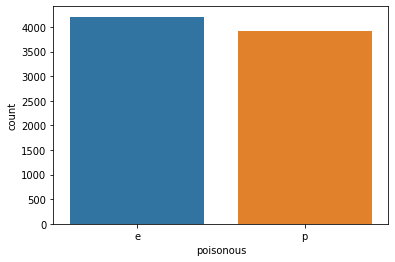

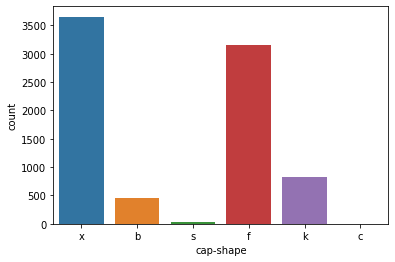

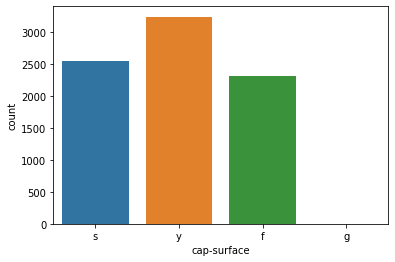

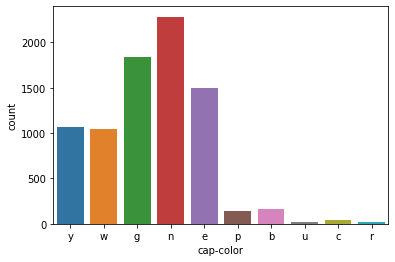

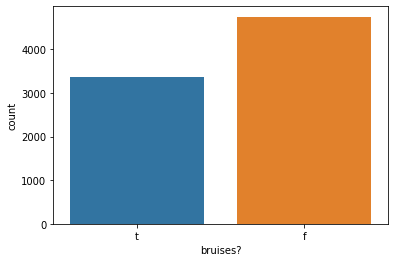

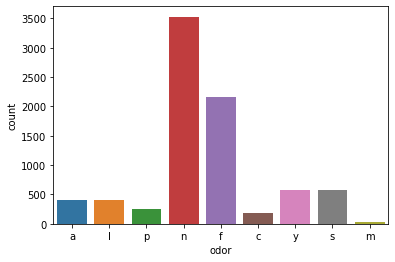

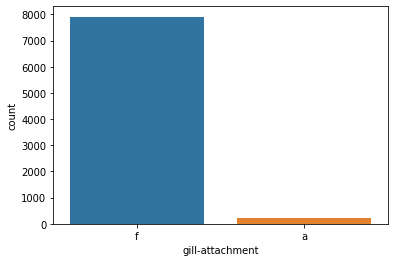

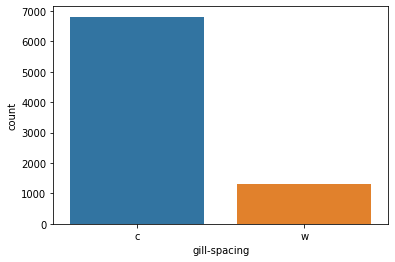

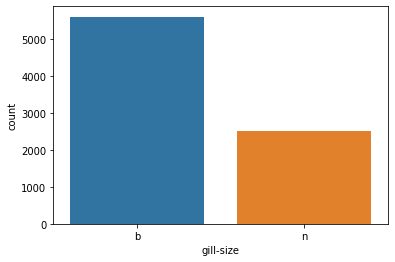

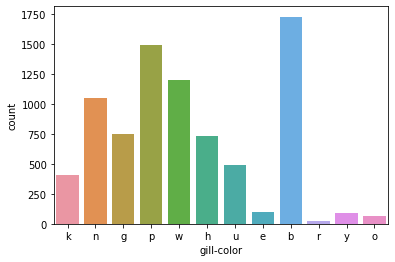

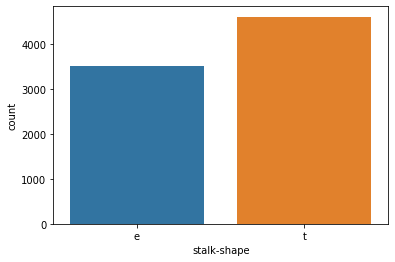

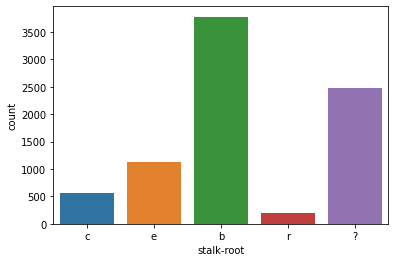

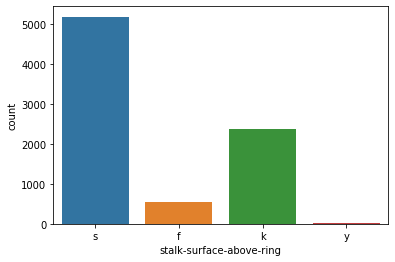

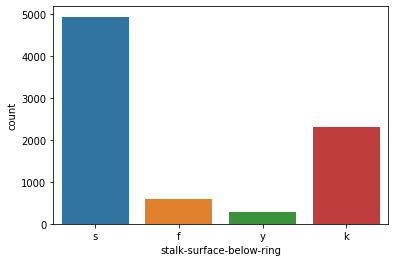

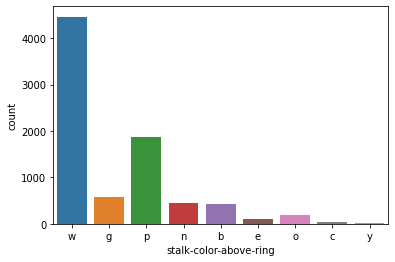

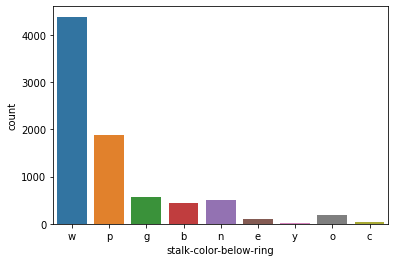

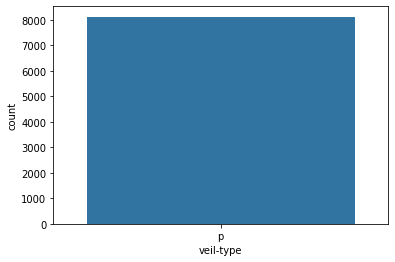

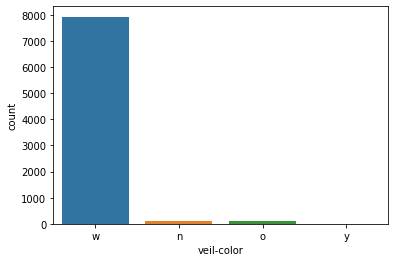

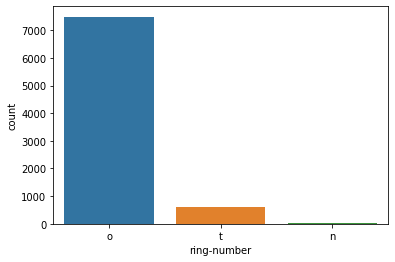

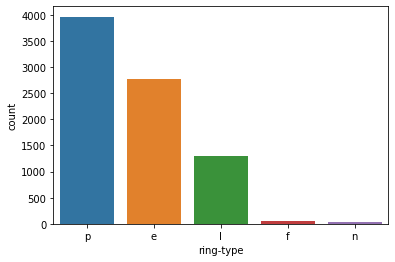

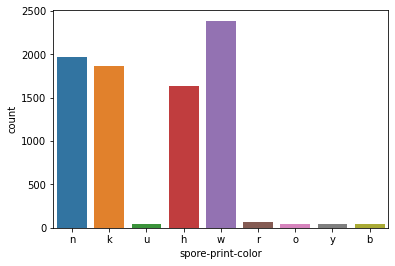

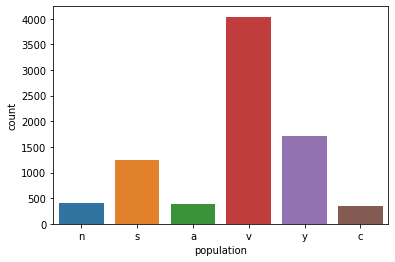

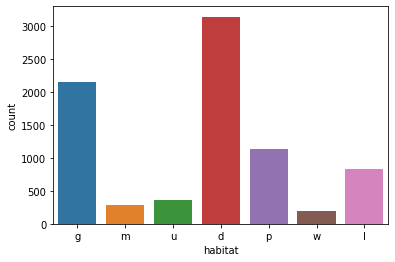

In [4]:
print('Frequency')
for i in list(mushroom_df):
    plt.figure()
    sns.countplot(x=i, data=mushroom_df)
    plt.show()

### Split Data Based on Label

利用Seaborn中的catplot計算poisonous=e及poisonous=p時各features各種數值的數量。

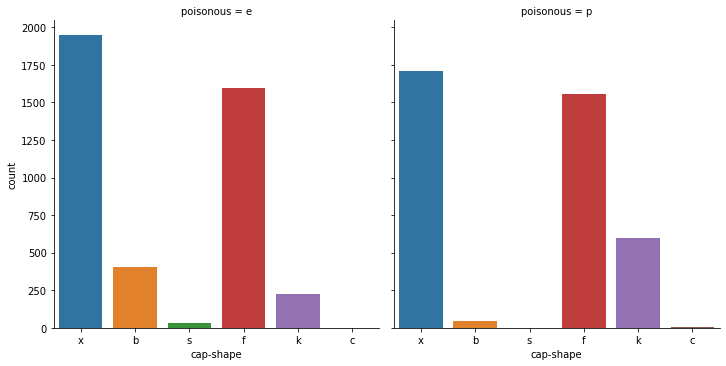

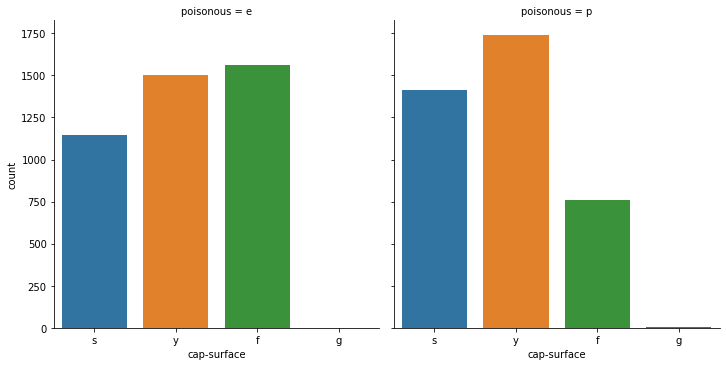

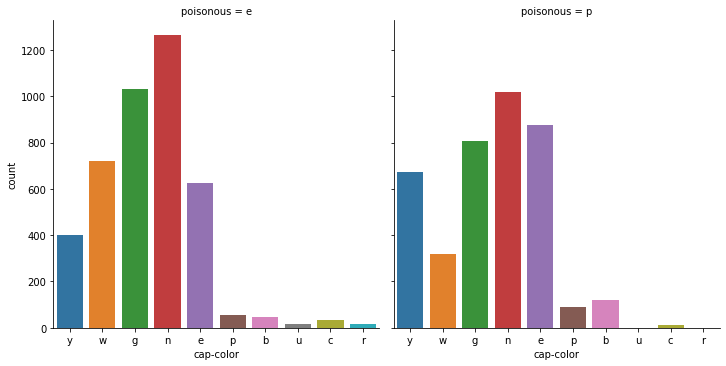

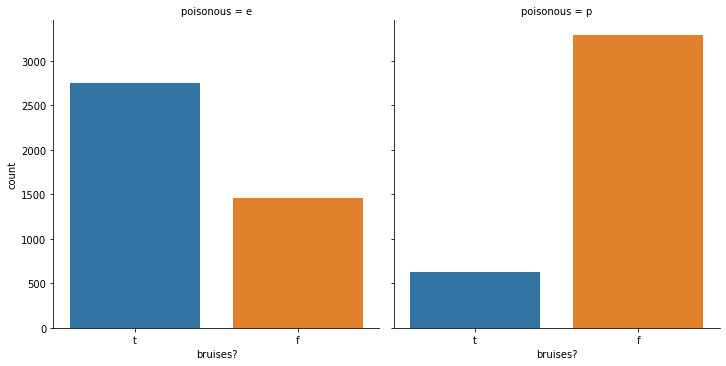

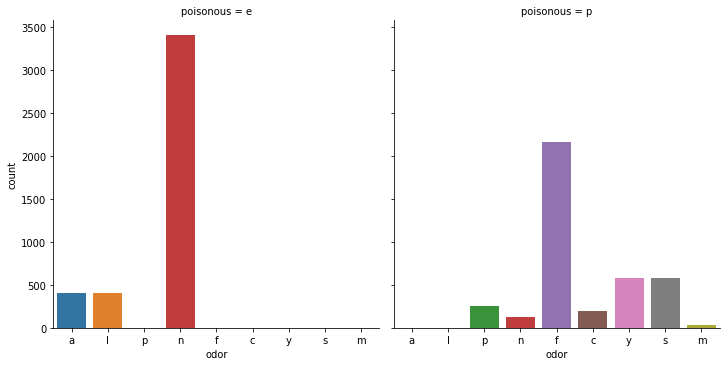

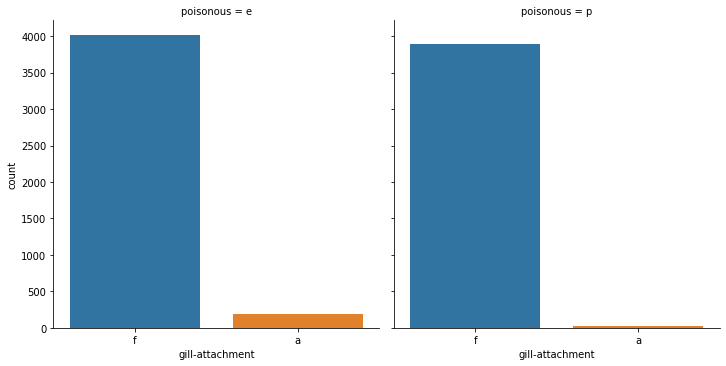

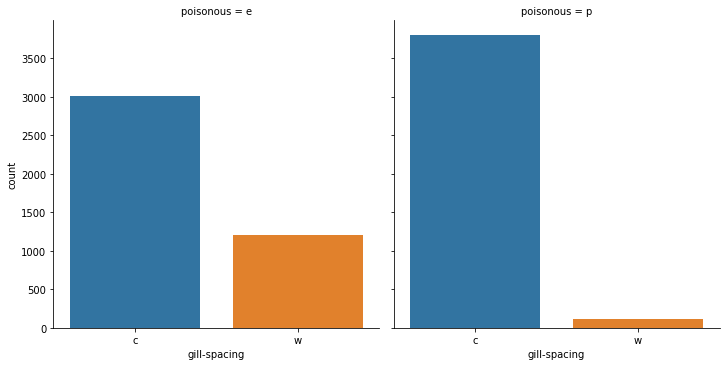

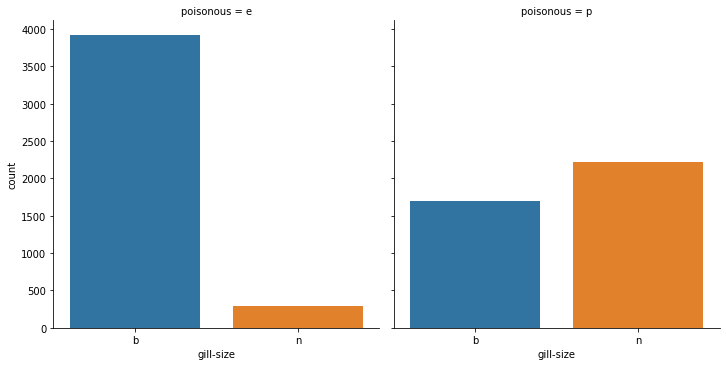

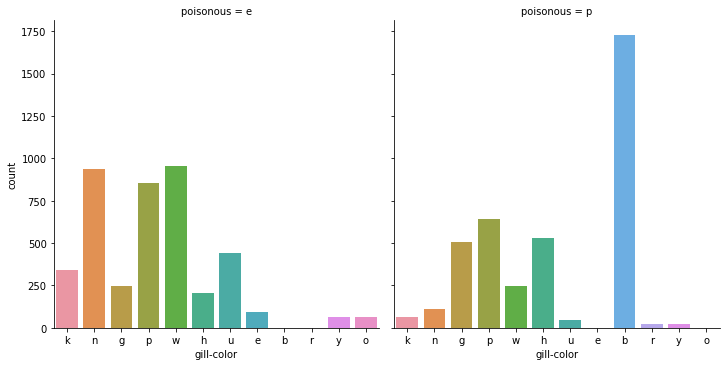

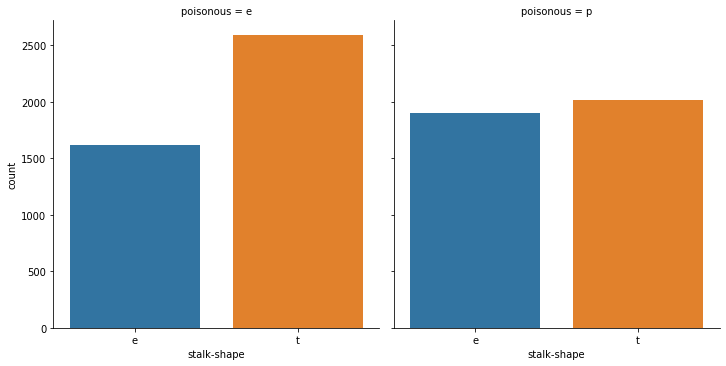

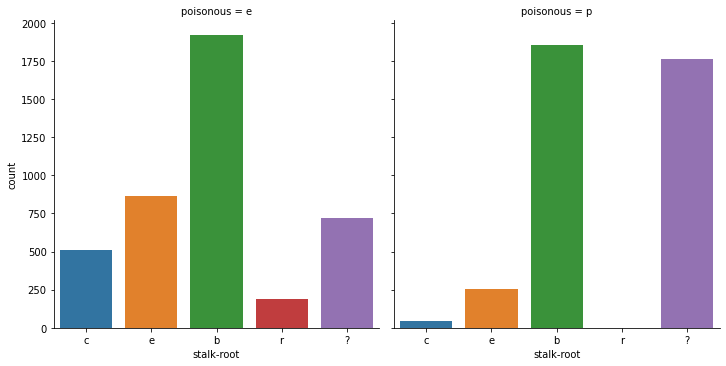

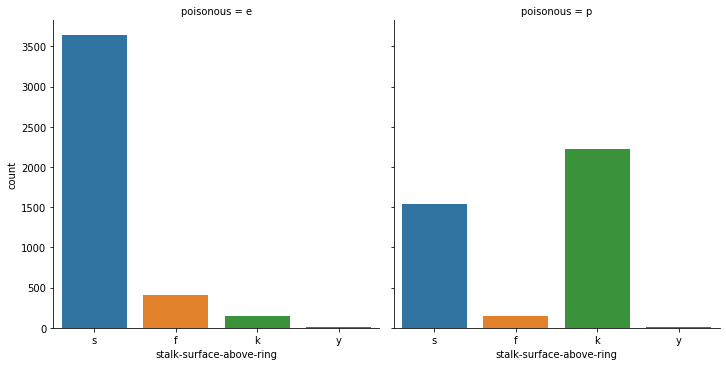

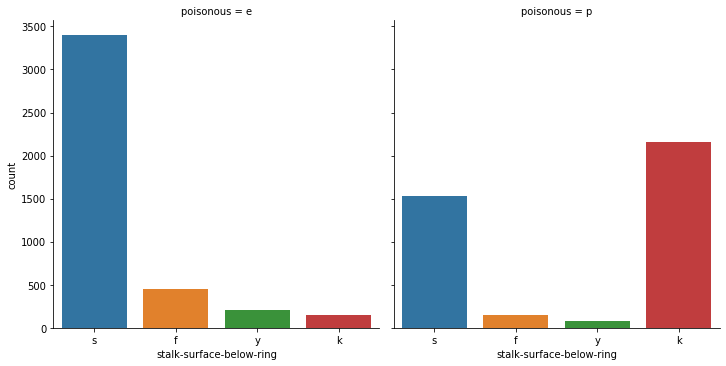

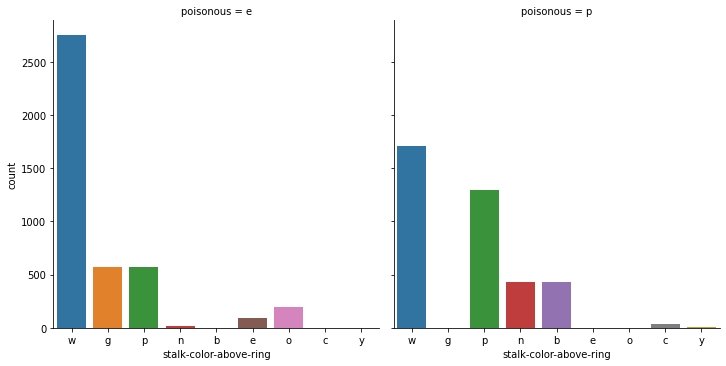

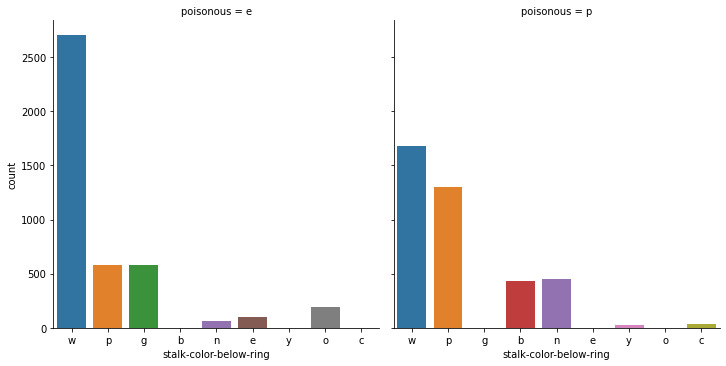

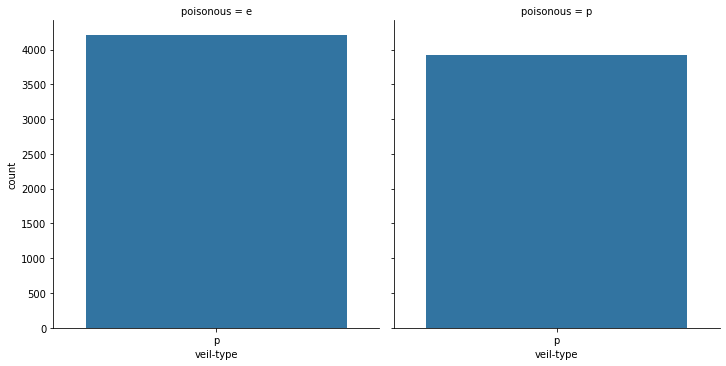

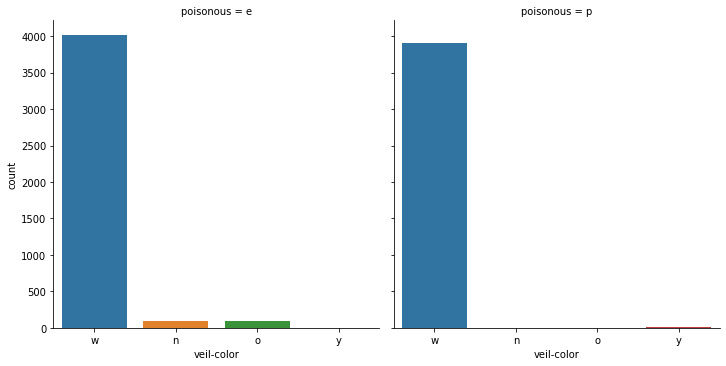

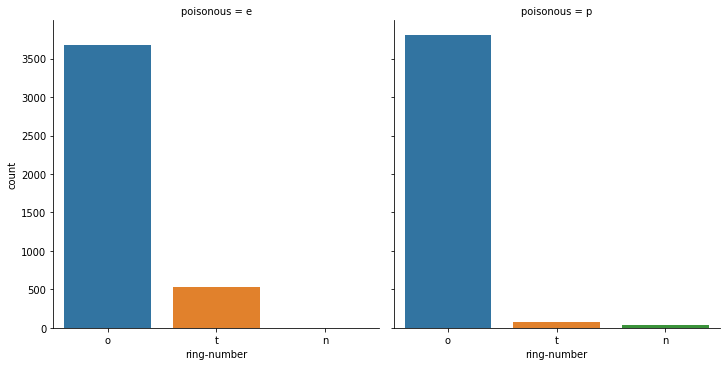

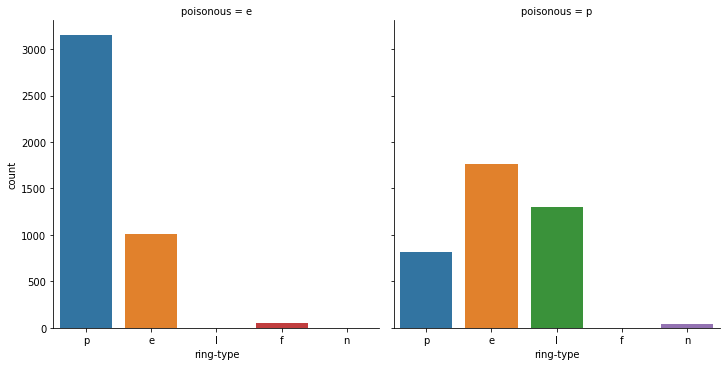

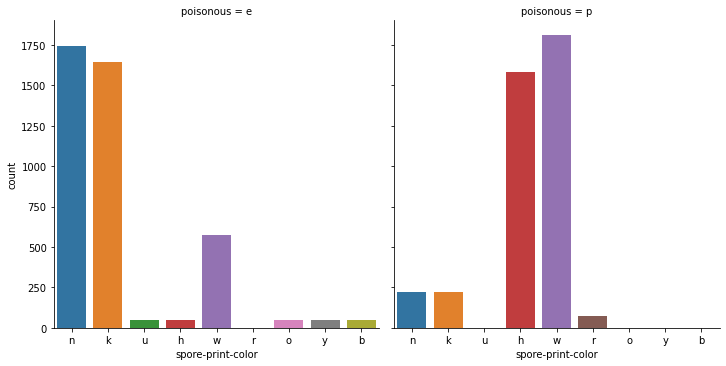

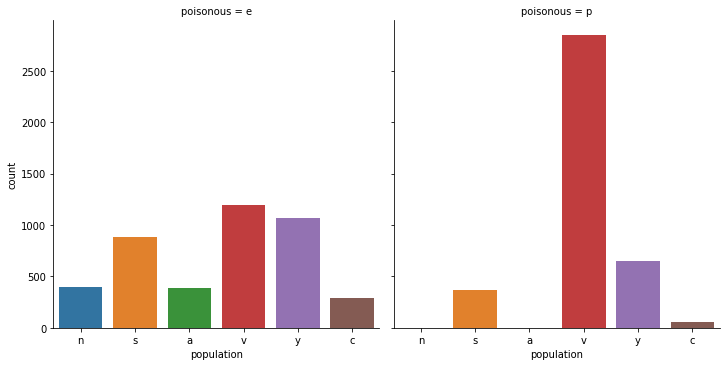

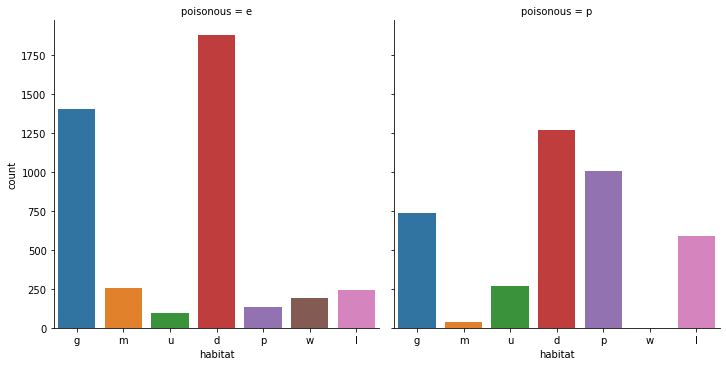

In [5]:
for i in list(mushroom_df):
    if i == "poisonous":
        continue
    sns.catplot(x=i, data=mushroom_df, col="poisonous", kind="count")
    plt.show()

## Iris Visualization

### Based on Average

現利用mean()算出Iris DataFrame中每個feature的平均，在用plot()畫出bar chart。

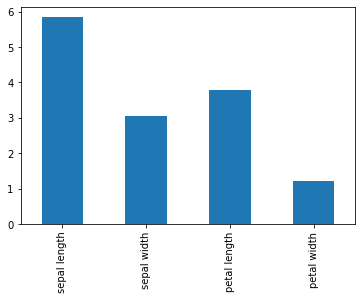

In [6]:
iris_df.mean().plot(kind='bar')
plt.show()

### Based on Standard Deviation

現利用mean()算出Iris DataFrame中每個feature的標準差，在用plot()畫出bar chart。

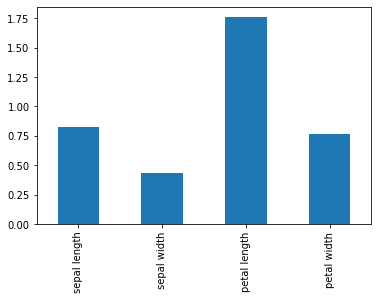

In [7]:
iris_df.std().plot(kind='bar')
plt.show()

### Based on Frequency

利用countplot計算各features各種數值的數量，代表Frequency。
i代表Iris DataFrame中各個feature的名字。

figsize用來設定圖的大小，以避免x軸的數字overlap。
set_xtickable用來設定x軸數字的樣式，rotation=40代表想左轉40度。

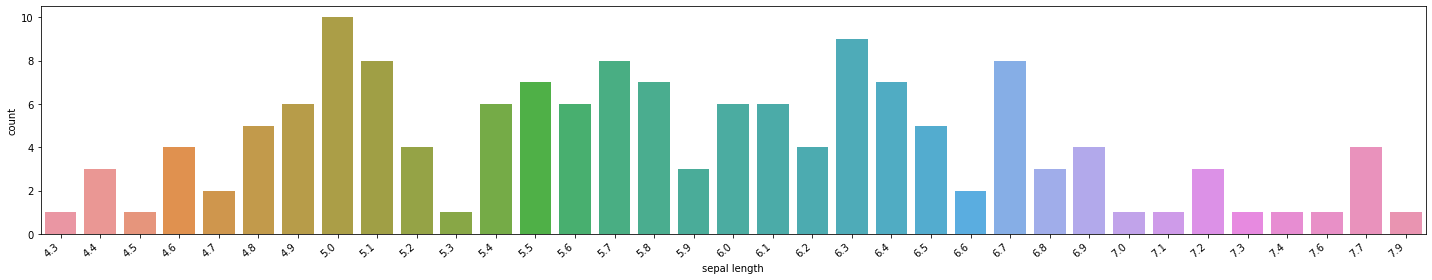

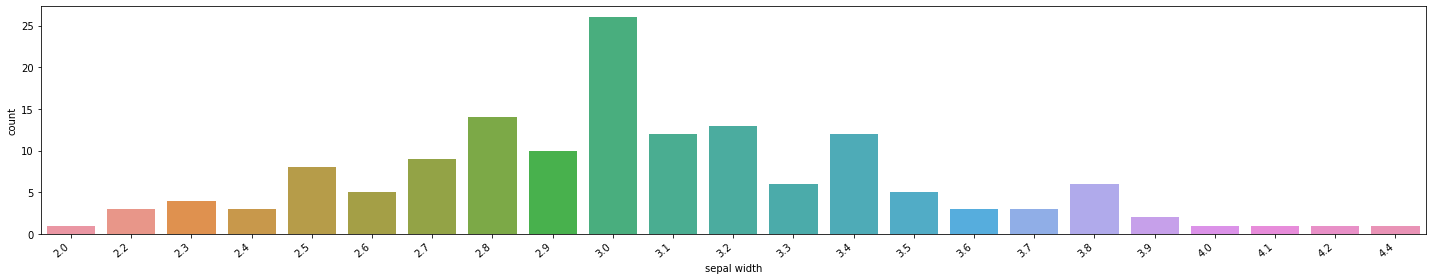

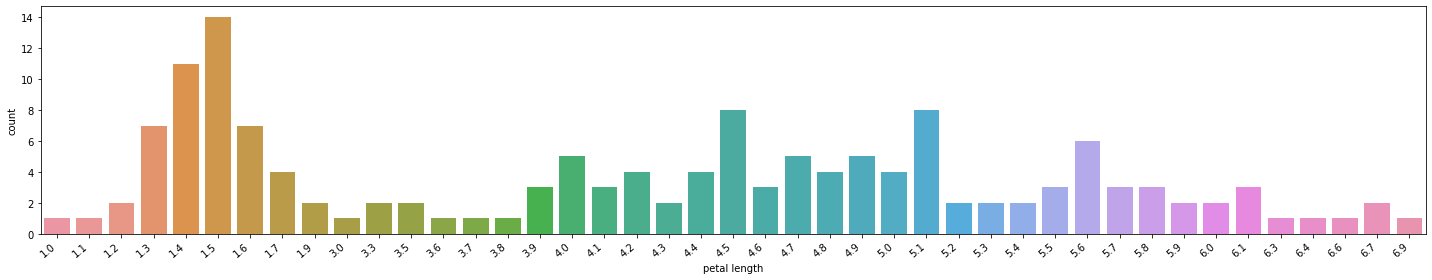

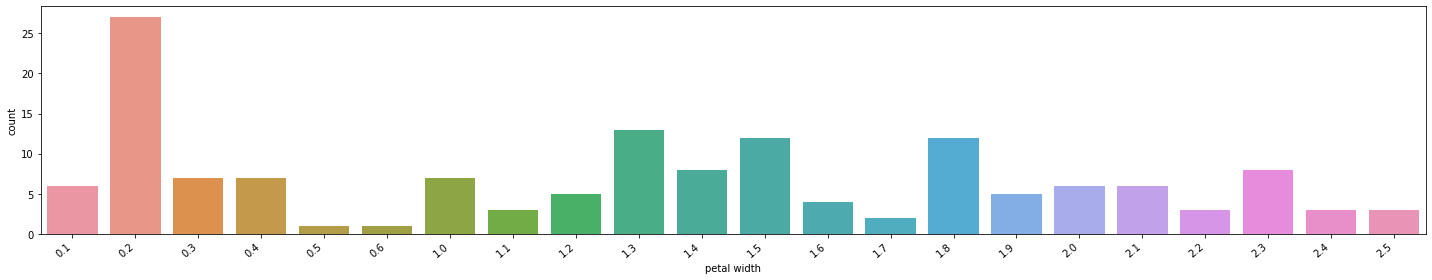

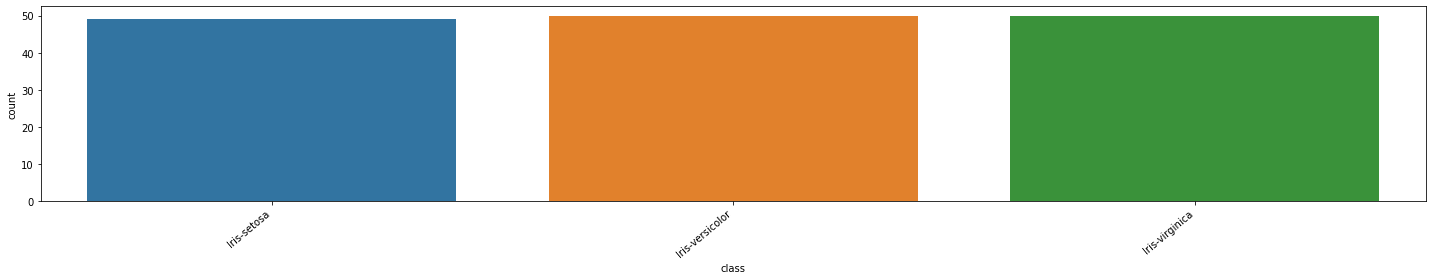

In [8]:
for i in list(iris_df):
    plt.figure(figsize=(20,4))
    ax = sns.countplot(x=i, data=iris_df)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    plt.tight_layout()
    plt.show()

### Split Data Based on Label

利用catplot計算各品種Iris中各features各種數值的數量。

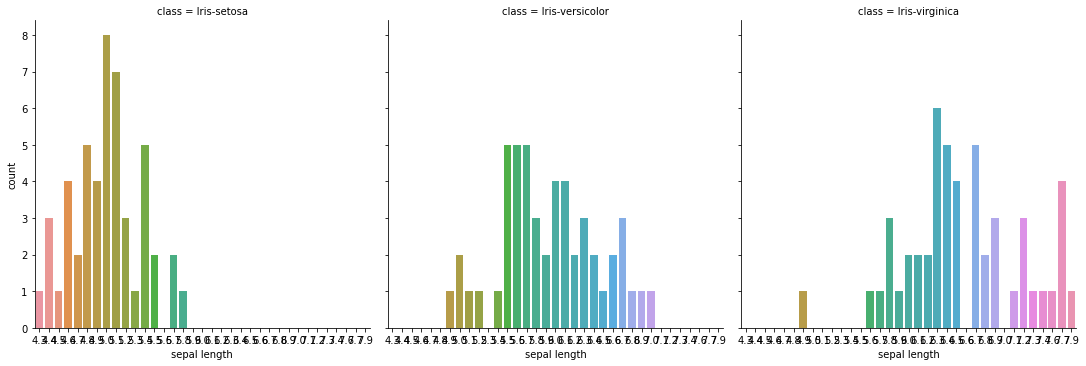

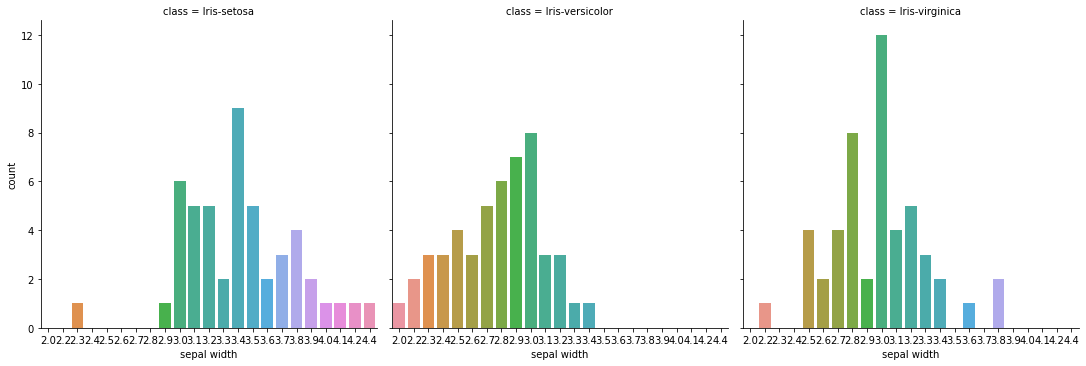

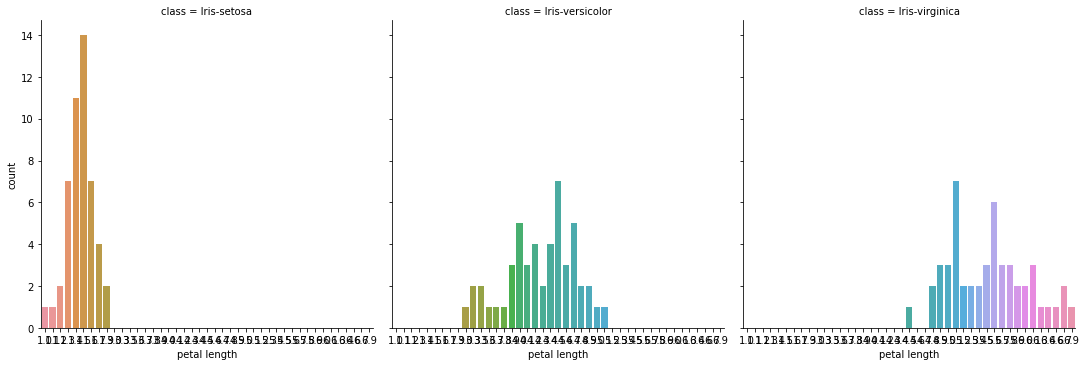

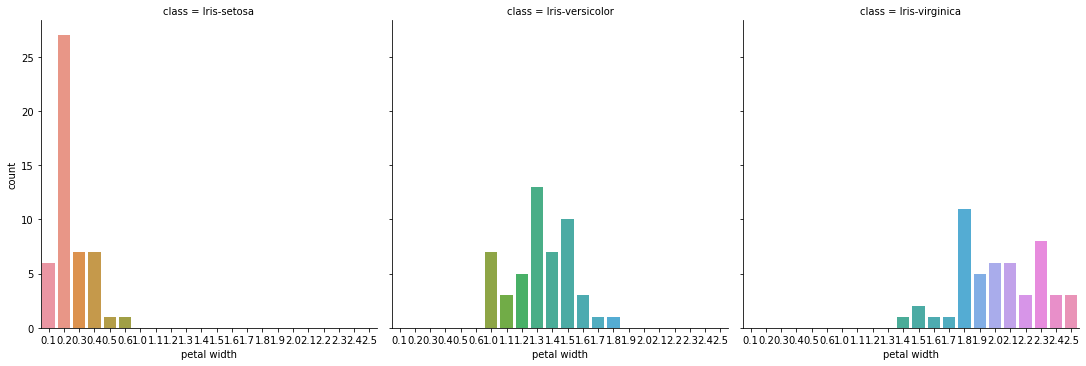

In [9]:
for i in list(iris_df):
    if i == "class":
        continue
    ax = sns.catplot(x=i, data=iris_df, col="class", kind="count")
    plt.show()

# 3. Data Preprocessing

## Drop features with missing value (Only Mushroom Needs)

用loc定位含有數值='?'的column並用~將其去除。.any()表示若column中含有至少一個'?'，則回傳True。

In [10]:
mushroom_df = mushroom_df.loc[:, ~(mushroom_df == '?').any()]
mushroom_df

,poisonous,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8119,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8120,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8121,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


## Transform data format and shape so the model can process them. (Only Mushroom Needs)

因為Mushroom DataFrame中原先的feature內的數值是用string表示，要將其轉換成數字才能執行，而這裡轉換的方式是用get_dummies，把每個features後面加上'\_?'（?表示原先該feature中可能的值），並用1代表True，0代表False。

In [11]:
mushroom_df = pd.get_dummies(mushroom_df)
mushroom_df

,poisonous_e,poisonous_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8119,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
8120,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8121,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


## Shuffle the Data

利用sklearn.utils中的shffle()將資料重排。

In [12]:
from sklearn.utils import shuffle

mushroom_df = shuffle(mushroom_df)
iris_df = shuffle(iris_df)

# 4. Model Construction

## Mushroom Model

利用sklearn.naive_bayes中的CategoricalNB建立model。

In [13]:
from sklearn.naive_bayes import CategoricalNB

### With Laplace Smoothing

將alpha設為1，表示會apply Laplce Smoothing且alpha是1。

In [14]:
mnb_w = CategoricalNB(alpha = 1)

### Without Laplace Smoothing

將alpha設為0，表示不apply Laplce Smoothing，即alpha是0。

In [15]:
mnb_wo = CategoricalNB(alpha = 0)

## Iris Model

利用sklearn.naive_bayes中的GaussianNB建立model。

In [16]:
from sklearn.naive_bayes import GaussianNB
inb = GaussianNB()

# 5. Train-Test-Split

## Using Holdout Validation

In [17]:
from sklearn.model_selection import train_test_split

### Mushroom

mushroom_X從第2個column開始，因為第0和1個column是poisonous_e和poisonous_p，也就是Target。

mushroom_y則是第0個column，即poisonous_e的column。

而holdout validation是利用sklearn.model_selection中的train_test_split分，並指定test_size以達到training data : testing data = 7 : 3。

In [18]:
mushroom_X = mushroom_df.iloc[:,2:]
mushroom_y = mushroom_df.iloc[:,0]

mushroom_X_train, mushroom_X_test, mushroom_y_train, mushroom_y_test = train_test_split(
    mushroom_X, mushroom_y, test_size=0.3)

### Iris

iris_X到第3個column，因為第4個column是class，也就是Target。

iris_y則是第4個column，即class的column。

而holdout validation是利用sklearn.model_selection中的train_test_split分，並指定test_size以達到training data : testing data = 7 : 3。

In [19]:
iris_X = iris_df.iloc[:,:4].values
iris_y = iris_df['class'].values

iris_X_train, iris_X_test, iris_y_train, iris_y_test = train_test_split(
    iris_X, iris_y, test_size = 0.3)

## Using K-fold Cross-Validation

In [20]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

### Mushroom

mkf是一個class，n_splits = 3表示K = 3。

mkf.split則是K-Fold class中的function，parameter = mushroom_X則是對其進行K-Fold。最後在將對應data分別存進mushroom_X_train_kf, mushroom_X_test_kf, mushroom_y_train_kf, mushroom_y_test_kf。

In [21]:
mkf = KFold(n_splits=3)

In [22]:
mushroom_X_train_kf = []
mushroom_X_test_kf = []
mushroom_y_train_kf = []
mushroom_y_test_kf = []

for train_index, test_index in mkf.split(mushroom_X):
    print("TRAIN:", train_index, "TEST:", test_index)
    mushroom_X_train_kf, mushroom_X_test_kf = mushroom_X_train_kf + [mushroom_X.iloc[train_index]], mushroom_X_test_kf + [mushroom_X.iloc[test_index]]
    mushroom_y_train_kf, mushroom_y_test_kf = mushroom_y_train_kf + [mushroom_y.iloc[train_index]], mushroom_y_test_kf + [mushroom_y.iloc[test_index]]

TRAIN: [2708 2709 2710 ... 8120 8121 8122] TEST: [   0    1    2 ... 2705 2706 2707]
TRAIN: [   0    1    2 ... 8120 8121 8122] TEST: [2708 2709 2710 ... 5413 5414 5415]
TRAIN: [   0    1    2 ... 5413 5414 5415] TEST: [5416 5417 5418 ... 8120 8121 8122]


### Iris

ikf是一個class，n_splits = 3表示K = 3。

ikf.split則是K-Fold class中的function，parameter = iris_X則是對其進行K-Fold。最後在將對應data分別存進iris_X_train_kf, iris_X_test_kf, iris_y_train_kf, iris_y_test_kf。

In [23]:
ikf = KFold(n_splits=3)

In [24]:
iris_X_train_kf = []
iris_X_test_kf = []
iris_y_train_kf = []
iris_y_test_kf = []

for train_index, test_index in ikf.split(iris_X):
    print("TRAIN:", train_index, "TEST:", test_index)
    iris_X_train_kf, iris_X_test_kf = iris_X_train_kf + [iris_X[train_index]], iris_X_test_kf + [iris_X[test_index]]
    iris_y_train_kf, iris_y_test_kf = iris_y_train_kf + [iris_y[train_index]], iris_y_test_kf + [iris_y[test_index]]
    

TRAIN: [ 50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85
  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103
 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121
 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 146 147 148] TEST: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]
TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49 100 101 102 103
 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121
 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 146 147 148] TEST: [50 51 52 53 5

# 6. Results

In [25]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict

## Using Holdout Validation

fit()即是將data丟進model中run以訓練model；predict()則是使用訓練好的model mnb_w進行預測，並將結果存於mushroom_y_pred。

利用confusion_matrix()算出confusion matrix，利用accuracy_score算出accuracy，利用recall_score算出recall，利用precision_score算出precision。

利用classification_report算出每個數值及平均。

### Mushroom with Laplace Smoothing

In [26]:
mnb_w.fit(mushroom_X_train, mushroom_y_train)

mushroom_y_pred = mnb_w.predict(mushroom_X_test)

mushroom_cm = confusion_matrix(mushroom_y_test, mushroom_y_pred)
print('Confusion matrix\n', mushroom_cm)

print('Accuracy: %.4f' % accuracy_score(mushroom_y_test, mushroom_y_pred))
print('Sensitivity(Recall):', recall_score(mushroom_y_test, mushroom_y_pred, average = None))
print('Precision:', precision_score(mushroom_y_test, mushroom_y_pred, average = None))

print(classification_report(mushroom_y_test, mushroom_y_pred))

Confusion matrix
 [[1068  111]
 [  12 1246]]
Accuracy: 0.9495
Sensitivity(Recall): [0.90585242 0.99046105]
Precision: [0.98888889 0.91820192]
              precision    recall  f1-score   support

           0       0.99      0.91      0.95      1179
           1       0.92      0.99      0.95      1258

    accuracy                           0.95      2437
   macro avg       0.95      0.95      0.95      2437
weighted avg       0.95      0.95      0.95      2437



### Mushroom without Laplace Smoothing

In [27]:
mnb_wo.fit(mushroom_X_train, mushroom_y_train)

mushroom_y_pred = mnb_wo.predict(mushroom_X_test)

mushroom_cm = confusion_matrix(mushroom_y_test, mushroom_y_pred)
print('Confusion matrix\n', mushroom_cm)

print('Accuracy: %.4f' % accuracy_score(mushroom_y_test, mushroom_y_pred))
print('Sensitivity(Recall):', recall_score(mushroom_y_test, mushroom_y_pred, average = None))
print('Precision:', precision_score(mushroom_y_test, mushroom_y_pred, average = None))

print(classification_report(mushroom_y_test, mushroom_y_pred))

Confusion matrix
 [[1178    1]
 [  10 1248]]
Accuracy: 0.9955
Sensitivity(Recall): [0.99915182 0.99205087]
Precision: [0.99158249 0.99919936]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1179
           1       1.00      0.99      1.00      1258

    accuracy                           1.00      2437
   macro avg       1.00      1.00      1.00      2437
weighted avg       1.00      1.00      1.00      2437



/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/naive_bayes.py:506: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


### Iris

In [28]:
inb.fit(iris_X_train, iris_y_train)

iris_y_pred = inb.predict(iris_X_test)

iris_cm = confusion_matrix(iris_y_test, iris_y_pred)
print('Confusion matrix\n', iris_cm)

print('Accuracy: %.4f' % accuracy_score(iris_y_test, iris_y_pred))
print('Sensitivity(Recall): ', recall_score(iris_y_test, iris_y_pred, average = None))
print('Precision:', precision_score(iris_y_test, iris_y_pred, average = None))

print(classification_report(iris_y_test, iris_y_pred))

Confusion matrix
 [[10  0  0]
 [ 0 17  1]
 [ 0  1 16]]
Accuracy: 0.9556
Sensitivity(Recall):  [1.         0.94444444 0.94117647]
Precision: [1.         0.94444444 0.94117647]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.94      0.94      0.94        18
 Iris-virginica       0.94      0.94      0.94        17

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



## Using K-fold Cross-Validation

與Holdout validation不同處在於training data及test data有多種不同組合，所以算出每種組合的score後再將其平均。

另外，利用cross_val_predict可以運用其預設的K-Fold方式得到prediction result，再將其利用classification report計算出各個score及平均。

### Mushroom with Laplace Smoothing

In [29]:
mushroom_accuracy_w = []
mushroom_recall_w = []
mushroom_precision_w = []

print('Confusion matrix')

for i in range(3):
    mnb_w.fit(mushroom_X_train_kf[i], mushroom_y_train_kf[i])

    mushroom_y_pred_kf = mnb_w.predict(mushroom_X_test_kf[i])

    mushroom_cm_kf = confusion_matrix(mushroom_y_test_kf[i], mushroom_y_pred_kf)
    print(mushroom_cm_kf, '\n')

    mushroom_accuracy_w += [accuracy_score(mushroom_y_test_kf[i], mushroom_y_pred_kf)]
    mushroom_recall_w += [recall_score(mushroom_y_test_kf[i], mushroom_y_pred_kf, average = None)]
    mushroom_precision_w += [precision_score(mushroom_y_test_kf[i], mushroom_y_pred_kf, average = None)]
    
print('Accuracy: %.4f' % np.mean(mushroom_accuracy_w))
print('Sensitivity(Recall): %.4f' % np.mean(mushroom_recall_w))
print('Precision: %.4f' % np.mean(mushroom_precision_w))
    
mushroom_preds_w = cross_val_predict(mnb_w, mushroom_X, mushroom_y, cv=3)
print(classification_report(mushroom_y, mushroom_preds_w))

Confusion matrix
[[1193  104]
 [  20 1391]] 

[[1174  152]
 [  14 1368]] 

[[1162  130]
 [  16 1399]] 

Accuracy: 0.9463
Sensitivity(Recall): 0.9448
Precision: 0.9506
              precision    recall  f1-score   support

           0       0.99      0.90      0.94      3915
           1       0.92      0.99      0.95      4208

    accuracy                           0.95      8123
   macro avg       0.95      0.95      0.95      8123
weighted avg       0.95      0.95      0.95      8123



### Mushroom without Laplace Smoothing

In [30]:
mushroom_accuracy_wo = []
mushroom_recall_wo = []
mushroom_precision_wo = []

print('Confusion matrix')

for i in range(3):
    mnb_wo.fit(mushroom_X_train_kf[i], mushroom_y_train_kf[i])

    mushroom_y_pred_kf = mnb_wo.predict(mushroom_X_test_kf[i])

    mushroom_cm_kf = confusion_matrix(mushroom_y_test_kf[i], mushroom_y_pred_kf)
    print(mushroom_cm_kf, '\n')

    mushroom_accuracy_wo += [accuracy_score(mushroom_y_test_kf[i], mushroom_y_pred_kf)]
    mushroom_recall_wo += [recall_score(mushroom_y_test_kf[i], mushroom_y_pred_kf, average = None)]
    mushroom_precision_wo += [precision_score(mushroom_y_test_kf[i], mushroom_y_pred_kf, average = None)]
    
print('Accuracy: %.4f' % np.mean(mushroom_accuracy_wo))
print('Sensitivity(Recall): %.4f' % np.mean(mushroom_recall_wo))
print('Precision: %.4f' % np.mean(mushroom_precision_wo))

mushroom_preds_wo = cross_val_predict(mnb_wo, mushroom_X, mushroom_y, cv=3)
print(classification_report(mushroom_y, mushroom_preds_wo))

Confusion matrix
[[1296    1]
 [  17 1394]] 

[[1324    2]
 [  11 1371]] 

[[1292    0]
 [  13 1402]] 

Accuracy: 0.9946
Sensitivity(Recall): 0.9948
Precision: 0.9944
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3915
           1       1.00      0.99      0.99      4208

    accuracy                           0.99      8123
   macro avg       0.99      0.99      0.99      8123
weighted avg       0.99      0.99      0.99      8123



/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/naive_bayes.py:506: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/naive_bayes.py:506: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/naive_bayes.py:506: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/naive_bayes.py:506: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will resu

### Iris

In [31]:
iris_accuracy = []
iris_recall = []
iris_precision = []

print('Confusion matrix')

for i in range(3):
    inb.fit(iris_X_train_kf[i], iris_y_train_kf[i])

    iris_y_pred_kf = inb.predict(iris_X_test_kf[i])

    iris_cm_kf = confusion_matrix(iris_y_test_kf[i], iris_y_pred_kf)
    print(iris_cm_kf, '\n')

    iris_accuracy += [accuracy_score(iris_y_test_kf[i], iris_y_pred_kf)]
    iris_recall += [recall_score(iris_y_test_kf[i], iris_y_pred_kf, average = None)]
    iris_precision += [precision_score(iris_y_test_kf[i], iris_y_pred_kf, average = None)]
    
print('Accuracy: %.4f' % np.mean(iris_accuracy))
print('Sensitivity(Recall): %.4f' % np.mean(iris_recall))
print('Precision: %.4f' % np.mean(iris_precision))

iris_preds = cross_val_predict(inb, iris_X, iris_y, cv=3)
print(classification_report(iris_y, iris_preds))

Confusion matrix
[[18  0  0]
 [ 0 17  1]
 [ 0  0 14]] 

[[19  0  0]
 [ 0 15  0]
 [ 0  3 13]] 

[[12  0  0]
 [ 0 14  3]
 [ 0  0 20]] 

Accuracy: 0.9529
Sensitivity(Recall): 0.9534
Precision: 0.9596
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        49
Iris-versicolor       0.94      0.92      0.93        50
 Iris-virginica       0.92      0.94      0.93        50

       accuracy                           0.95       149
      macro avg       0.95      0.95      0.95       149
   weighted avg       0.95      0.95      0.95       149



# 7. Comparison & Conclusion

In [37]:
print('  Accuracy Comparison\n')
print('\tHoldout\tK-fold')
print('m_w_lp\t0.9495\t0.9463')
print('m_wo_lp\t0.9955\t0.9946')
print('iris\t0.9556\t0.9529')

  Accuracy Comparison

	Holdout	K-fold
m_w_lp	0.9495	0.9463
m_wo_lp	0.9955	0.9946
iris	0.9556	0.9529


The results of mushroom dataset WITHOUT Laplace Smoothing performed better than those WITH Laplace Smoothing (alpha is 1) whatever methods are applied (holdout or K-fold validation).

The result of mushroom dataset WITH Laplace Smoothing applying HOLOUT VALIDATION performed SLIGHTLY better than those applying K-FOLD VALIDATION.

The result of mushroom dataset WITHOUT Laplace Smoothing applying HOLDOUT VALIDATION performed SLIGHTLY better than that applying K-FOLD VALIDATION.

The result of Iris dataset applying HOLDOUT VALIDATION performed better than that applying K-FOLD VALIDATION.

#### THE COMPARISON ABOVE ARE NOT ALWAYS IDENTICAL EVERY TIME RUNNING DUE TO DATA SHUFFLING

# 8. Questions

## For the Mushroom Dataset

### 1. P (Xstalk−color−below−ring | Y = e)

### Without Laplace Smoothing

without Laplace Smoothing即忠於事實的計算，不需加額外的alpha，所以這裡直接利用len()計算符合condition的data數量（效果類似count），並將相關數值進行計算即可得到機率。

	P(Xstalk−color−below−ring|Y=e)


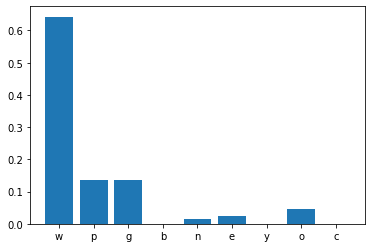

In [33]:
scbr = ['w', 'p', 'g', 'b', 'n', 'e', 'y', 'o', 'c']

pr = []
total_e = len(mushroom_df[mushroom_df['poisonous_e'] == 1])

for i in scbr:
    scbrne = len(mushroom_df[(mushroom_df['stalk-color-below-ring_'+ i] == 1) & (mushroom_df['poisonous_e'] == 1)])
    pr = pr + [scbrne / total_e]    

x = np.arange(9)
plt.bar(x, height = pr)
plt.xticks(x, scbr)
print('\tP(Xstalk−color−below−ring|Y=e)')
plt.show()

### With Laplace Smoothing

with Laplace Smoothing即將每個事件加alpha，並在分母加n * alpha（此處將alpha設為4以便從圖中觀察），並利用len()計算符合condition的data數量（效果類似count），並將相關數值進行計算（注意alpha），即可得到機率。

	P(Xstalk−color−below−ring|Y=e)


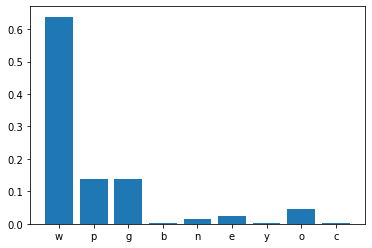

In [34]:
prw = []
alpha = 4

for i in scbr:
    scbrne = len(mushroom_df[(mushroom_df['stalk-color-below-ring_'+ i] == 1) & (mushroom_df['poisonous_e'] == 1)])
    prw = prw + [(scbrne + alpha) / (total_e + 9*alpha)]
    
x = np.arange(9)
plt.bar(x, height = prw)
plt.xticks(x, scbr)
print('\tP(Xstalk−color−below−ring|Y=e)')
plt.show()

## For the Iris Dataset

### 1. The Values of μ and σ of P (Xpetal_length | Y = Iris Versicolour)

因為一般的range不能iterate float，所以利用numpy中的arange解決此問題，並將所有可能的值存入pl。

len()可以計算出符合condition的data的數量，效果類似count。

由於不確定老師是要求機率的μ和σ，或是該機率算是中會運用到的μ和σ，所以兩者皆有寫。如果老師要求的是前者，則是第一組答案，若老師要求的是後者，則是第二組答案。

第二組答案計算μ和σ時需要用weighted mean，相較於 x weight，這裡利用將其在list中存入weight次再利用mean()進行平均以達成相同效果。而計算σ的方法與mean類似，區別僅是呼叫不同function。

In [35]:
pl = []

for i in np.arange(1.0,7.0,0.1):
    i = round(i, 1)
    pl = pl + [i]

total_v = len(iris_df[iris_df['class'] == 'Iris-versicolor'])

# μ and σ of P(Xpetal_length | Y = Iris Versicolour)
pri = []

for i in pl:
    plne = len(iris_df[(iris_df['petal length'] == i) & (iris_df['class'] == 'Iris-versicolor')])
    
    if plne == 0:
        continue
        
    pri = pri + [plne / total_v]
    
print('μ and σ of P(Xpetal_length | Y = Iris Versicolour):')
print('μ =', np.mean(pri))
print('σ =', np.std(pri, ddof = 1), '\n')

# μ and σ in P(Xpetal_length | Y = Iris Versicolour)
hf = []

for i in pl:
    plne = len(iris_df[(iris_df['petal length'] == i) & (iris_df['class'] == 'Iris-versicolor')])
    
    if plne == 0:
        continue
        
    hf = hf + plne*[i]
    
print('μ and σ in P(Xpetal_length | Y = Iris Versicolour):')
print('μ =', np.mean(hf))
print('σ =', np.std(hf, ddof = 1))

μ and σ of P(Xpetal_length | Y = Iris Versicolour):
μ = 0.05263157894736842
σ = 0.03413081131033593 

μ and σ in P(Xpetal_length | Y = Iris Versicolour):
μ = 4.26
σ = 0.46991097723995795


### 2. Probability Density Function of P (Xpetal_length | Y = Iris Versicolour)

從DataFrame選出品種是versicolor的data，再利用kdeplot將其的petal length利用density表示出來。fill是填入顏色，color是指定顏色。

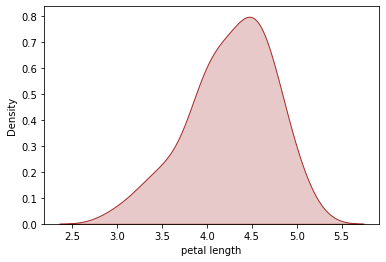

In [36]:
d = iris_df[iris_df['class'] == 'Iris-versicolor']

sns.kdeplot(data = d, x = 'petal length', fill = True, color = 'brown')
plt.show()